Q-table after training:
[[[ 0.          0.          0.          0.        ]
  [ 0.          0.          0.          0.        ]
  [ 0.          0.          0.          0.        ]
  [ 0.          0.          0.          0.        ]
  [ 0.          0.          0.          0.        ]
  [ 0.          0.          0.          0.        ]
  [ 0.          0.          0.          0.        ]
  [ 0.          0.          0.          0.        ]
  [ 0.          0.          0.          0.        ]
  [ 0.          0.          0.          0.        ]]

 [[ 0.          0.          0.          0.        ]
  [ 0.         24.18626316  0.          0.        ]
  [ 0.          0.          0.          0.        ]
  [ 0.          0.          0.         -0.3439    ]
  [ 0.          0.          0.         -0.19      ]
  [ 0.          0.         -0.1         0.        ]
  [ 0.          0.          0.          0.        ]
  [ 0.          0.          0.          0.        ]
  [ 0.          0.          0.        

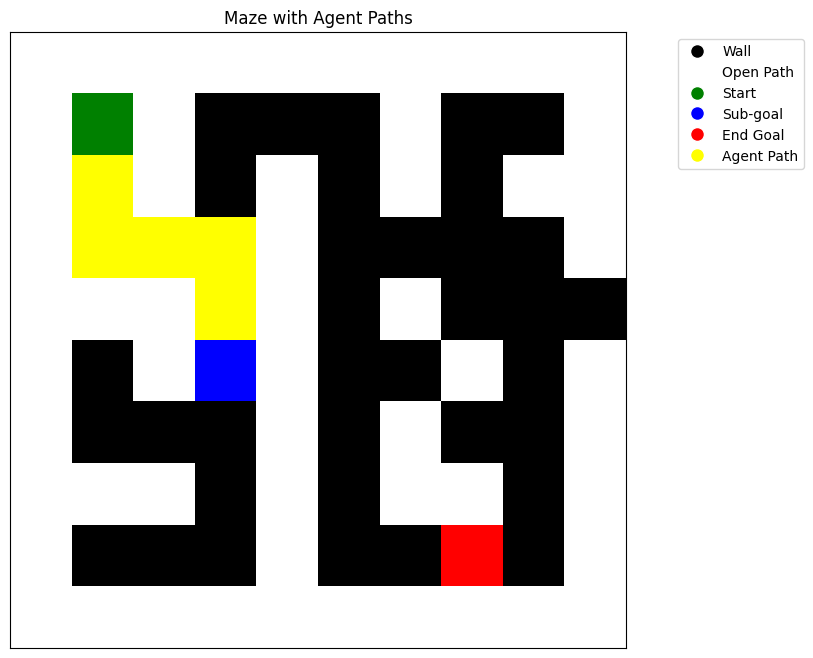

Steps to Sub-goal: 7
Steps to End Goal: 101


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Create the maze environment
maze = np.array([
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 1, 0, 0, 0, 1, 0, 0, 1],
    [1, 0, 1, 0, 1, 0, 1, 0, 1, 1],
    [1, 0, 0, 0, 1, 0, 0, 0, 0, 1],
    [1, 1, 1, 0, 1, 0, 1, 0, 0, 0],
    [1, 0, 1, 0, 1, 0, 0, 1, 0, 1],
    [1, 0, 0, 0, 1, 0, 1, 0, 0, 1],
    [1, 1, 1, 0, 1, 0, 1, 1, 0, 1],
    [1, 0, 0, 0, 1, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
])

# S (start), G (sub-goal), E (end goal) positions in the maze
start_position = (1, 1)       # S (Green)
sub_goal_position = (5, 3)    # G (Blue)
end_goal_position = (8, 7)    # E (Red)

# Define the actions the agent can take: Up, Down, Left, Right
actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

# Set the start, sub-goal, and end-goal positions as open paths (passable)
maze[start_position] = 0
maze[sub_goal_position] = 0
maze[end_goal_position] = 0

# Q-learning parameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Exploration rate
num_episodes = 1000  # Number of episodes for training
max_steps = 100  # Limit steps to prevent infinite loops

# Initialize Q-table
q_table = np.zeros((maze.shape[0], maze.shape[1], len(actions)))

# Reward matrix definition
reward_matrix = np.full(maze.shape, -1.0)  # Default negative reward for each step
reward_matrix[sub_goal_position] = 10.0  # Reward for reaching sub-goal
reward_matrix[end_goal_position] = 50.0  # Reward for reaching end goal

# Modified Q-learning function to handle sequential goals
def q_learning():
    for episode in range(num_episodes):
        current_state = start_position
        reached_sub_goal = False  # Flag to check if the sub-goal has been reached

        for step in range(max_steps):
            if random.uniform(0, 1) < epsilon:  # Explore
                action_index = random.randint(0, len(actions) - 1)
            else:  # Exploit
                action_index = np.argmax(q_table[current_state])

            action = actions[action_index]
            next_state = (current_state[0] + action[0], current_state[1] + action[1])

            # Check if next_state is valid
            if (0 <= next_state[0] < maze.shape[0] and 
                0 <= next_state[1] < maze.shape[1] and 
                maze[next_state] == 0):  # Only consider valid moves

                # Get the reward for the next state
                reward = reward_matrix[next_state]
                
                # Update Q-value using the Q-learning formula
                q_table[current_state][action_index] += alpha * (
                    reward + gamma * np.max(q_table[next_state]) - q_table[current_state][action_index]
                )

                current_state = next_state  # Move to the next state

                # Check if the agent has reached the sub-goal
                if current_state == sub_goal_position and not reached_sub_goal:
                    reached_sub_goal = True  # Set the flag to true when sub-goal is reached
                    #print(f"Sub-goal reached at step {step} in episode {episode}. Continuing to the end goal.")
                
                # If the agent has reached the end goal, break out of the loop
                if current_state == end_goal_position:
                    #print(f"End goal reached at step {step} in episode {episode}.")
                    break

# Run the modified Q-learning
q_learning()

# Print the Q-table for debugging purposes
print("Q-table after training:")
print(q_table)

# Function to extract the optimal path from start to goal
def extract_path(start, goal):
    current = start
    path = [current]
    max_steps = 100  # Limit steps to prevent infinite loops
    steps = 0

    while current != goal and steps < max_steps:
        next_state = None
        max_value = float('-inf')

        # Check all possible next states
        for action_index, action in enumerate(actions):
            new_state = (current[0] + action[0], current[1] + action[1])
            if (0 <= new_state[0] < maze.shape[0] and 
                0 <= new_state[1] < maze.shape[1] and 
                maze[new_state] == 0):  # Only consider valid moves
                if q_table[current][action_index] > max_value:
                    max_value = q_table[current][action_index]
                    next_state = new_state

        if next_state is None:  # No valid next state found
            print("No path found.")
            break
        
        path.append(next_state)
        current = next_state
        steps += 1

    return path

# Extract the path to the sub-goal and end-goal
path_to_sub_goal = extract_path(start_position, sub_goal_position)
path_to_end_goal = extract_path(sub_goal_position, end_goal_position)

# Function to visualize the agent's path with clearer colors
def visualize_paths(paths):
    maze_copy = np.copy(maze)  # Create a copy of the original maze

    # Mark the start, sub-goal, and end-goal positions
    maze_copy[start_position] = 2  # Start (Green)
    maze_copy[sub_goal_position] = 3  # Sub-goal (Blue)
    maze_copy[end_goal_position] = 4  # End Goal (Red)

    # Mark the paths in the maze
    for path in paths:
        for step in path:
            if maze_copy[step] == 0:  # Only mark the open cells, not the goals
                maze_copy[step] = 5  # Path (Yellow)

    # Create a color map
    cmap = plt.cm.colors.ListedColormap(['black', 'white', 'green', 'blue', 'red', 'yellow'])
    bounds = [0, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5]
    norm = plt.cm.colors.BoundaryNorm(bounds, cmap.N)

    # Visualize the maze with paths
    plt.figure(figsize=(8, 8))
    plt.imshow(maze_copy, cmap=cmap, norm=norm)
    plt.xticks([])  # Remove x-axis ticks
    plt.yticks([])  # Remove y-axis ticks

    # Add a legend for clarity
    labels = ['Wall', 'Open Path', 'Start', 'Sub-goal', 'End Goal', 'Agent Path']
    colors = ['black', 'white', 'green', 'blue', 'red', 'yellow']
    patches = [plt.Line2D([0], [0], marker='o', color='w', label=label, 
                          markerfacecolor=color, markersize=10) for label, color in zip(labels, colors)]
    plt.legend(handles=patches, loc='upper right', bbox_to_anchor=(1.3, 1))
    plt.title("Maze with Agent Paths")
    plt.show()

# Visualize the paths
visualize_paths([path_to_sub_goal, path_to_end_goal])

# Print the number of steps to each goal
print(f"Steps to Sub-goal: {len(path_to_sub_goal)}")
print(f"Steps to End Goal: {len(path_to_end_goal)}")
